In [1]:
# وارد کردن کتابخانه‌های مورد نیاز
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import pickle

In [2]:
df = pd.read_excel('preprocessed.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           90 non-null     int64  
 1   GridFins                             90 non-null     int64  
 2   Reused                               90 non-null     int64  
 3   Legs                                 90 non-null     int64  
 4   PayloadMass                          90 non-null     float64
 5   Block                                90 non-null     int64  
 6   ReusedCount                          90 non-null     int64  
 7   Orbit_ES-L1                          90 non-null     int64  
 8   Orbit_GEO                            90 non-null     int64  
 9   Orbit_GTO                            90 non-null     int64  
 10  Orbit_HEO                            90 non-null     int64  
 11  Orbit_ISS                         

In [3]:
X = df.drop('Class' , axis=1)
Y = df['Class']

## <font color='blue'> Standardization  VS  Min-Max Scaling </font>

| ویژگی  |Standardization  | Min-Max Scaling |
|:--------:|:--------:|:--------:|
|  محدوده مقادیر   |  داده‌ها ممکن است خارج از بازه [0, 1] باشند.   |  داده‌ها در بازه مشخصی مانند [0, 1] یا [-1, 1] قرار می‌گیرند.   |
|  توزیع داده‌ها   |  مناسب برای داده‌هایی که توزیع نرمال دارند.   | بهتر برای داده‌هایی که دارای توزیع یکنواخت </br>(Uniform) یا پخش‌شده هستند.   |
| حساسیت به مقادیر پرت   |  کمتر حساس به مقادیر پرت (Outliers)	   | بسیار حساس به مقادیر پرت،</br> زیرا تغییرات بزرگ در مقادیر پرت می‌تواند</br> مقیاس کل ویژگی را تحت تاثیر قرار دهد.   |
|  مدل‌های مناسب   |  مناسب برای مدل‌های حساس به مقیاس مانند </br>SVM, KNN, Ridge, Logistic Regression   |  مناسب برای مدل‌هایی که</br> به مقیاس‌های دقیق و محدود نیاز دارند</br> مانند شبکه‌های عصبی یا درخت‌های تصمیم.   |


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-1.71291154, -1.87082869, -0.83553169, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.67441914, -1.87082869, -0.83553169, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.63592675, -1.87082869, -0.83553169, ..., -0.21566555,
        -0.18569534, -0.10599979],
       ...,
       [ 1.63592675,  0.53452248,  1.19684269, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [ 1.67441914,  0.53452248,  1.19684269, ..., -0.21566555,
         5.38516481, -0.10599979],
       [ 1.71291154,  0.53452248, -0.83553169, ..., -0.21566555,
        -0.18569534,  9.43398113]])

In [5]:
X = pd.DataFrame(X_scaled , columns= X.columns)
X

,Unnamed: 0,GridFins,Reused,Legs,PayloadMass,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-1.712912,-1.870829,-0.835532,-0.482573,-0.023666,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
1,-1.674419,-1.870829,-0.835532,-0.482573,-1.233681,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
2,-1.635927,-1.870829,-0.835532,-0.482573,-1.200720,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
3,-1.597434,-1.870829,-0.835532,-0.482573,0.489003,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
4,-1.558942,-1.870829,-0.835532,-0.482573,-0.660113,-1.575895,-0.973440,-0.106,-0.106,1.527525,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,0.534522,1.196843,2.072225,1.991964,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000
86,1.597434,0.534522,1.196843,2.072225,1.991964,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,5.385165,-0.215666,-0.185695,-0.106000
87,1.635927,0.534522,1.196843,2.072225,1.991964,0.945537,1.966480,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,4.123106,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
88,1.674419,0.534522,1.196843,2.072225,1.991964,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000


In [6]:
# تقسیم داده‌ها به داده‌های آموزش و تست (80% آموزش و 20% تست)
X_train, X_test, y_train, y_test = train_test_split(X , Y , test_size=0.30, random_state=42)

# نمایش ابعاد داده‌های تقسیم شده
print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")


Training data: (63, 87), Test data: (27, 87)


In [7]:
# ایجاد مدل رگرسیون لاجستیک
model = LogisticRegression()

# آموزش مدل روی داده‌های آموزشی
model.fit(X_train, y_train)

# پیش‌بینی روی داده‌های تست
y_pred = model.predict(X_test)

# نمایش پیش‌بینی‌ها
print(f"Predictions: {y_pred}")

Predictions: [1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1]


حالا که مدل آموزش داده شده و پیش‌بینی کرده است
باید عملکرد آن را ارزیابی کنیم 
</br>این کار را با استفاده از معیارهای مختلف ارزیابی مانند  
</br> <font color='purple' > (accuracy)، (classification report) , (confusion matrix) </font>
</br> انجام می‌دهیم

Accuracy: 96.30%
Confusion Matrix:
[[ 6  1]
 [ 0 20]]


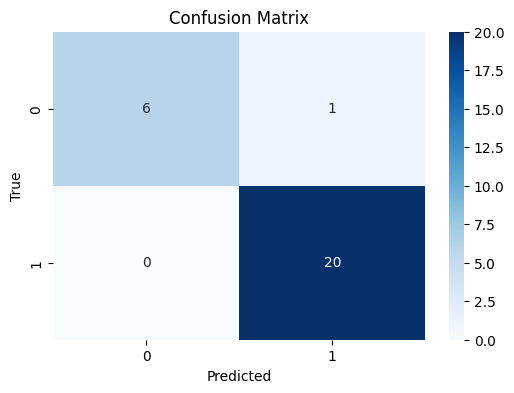

In [8]:
# دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



# نمایش ماتریس اغلاط به صورت گرافیکی
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## <font color='Red'>جدول مقایسه ای مدل  های رگرسیونی  </font>

| حساس به داده‌های نویزی  |قدرت مدل‌سازی	   |  پیچیدگی | نوع رابطه	  |  مدل  |
|:--------:|:--------:|:--------:|:--------:|:--------:|
| بالا |پایین  |کم  | خطی | Linear Regression	 |
| متوسط | بسیار بالا	 | بالا	 | غیرخطی | SVR |
| بالا | بالا | متوسط | غیرخطی |Decision Tree Regressor	  |
| پایین | بسیار بالا	 | بالا | غیرخطی | Random Forest Regressor	 |
| بالا | بسیار بالا	 | بالا	 | غیرخطی | Gradient Boosting	 |
| بالا | متوسط	 | پایین | هر دو	 | KNeighbors Regressor	 |

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib.figure import Figure

import seaborn as sns

sns.set(style="whitegrid", palette="muted")

In [10]:

# تابع برای آموزش و ارزیابی مدل‌ها با بررسی overfitting و underfitting
def evaluate_classifiers(X, y):
    # تقسیم داده‌ها به داده‌های آموزشی و تست
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # نرمالیزه کردن داده‌ها
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # تعریف مدل‌ها
    models = {
        "Logistic Regression": LogisticRegression(),
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "KNN": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }
    
    # دیکشنری برای ذخیره نتایج مدل‌ها
    results = {}

    # آموزش و ارزیابی مدل‌ها
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # ارزیابی cross-validation برای جلوگیری از overfitting
        cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()  # میانگین دقت با cross-validation
        train_accuracy = model.score(X_train, y_train)  # دقت روی داده‌های آموزشی
        test_accuracy = accuracy_score(y_test, y_pred)  # دقت روی داده‌های تست
        
        # ذخیره نتایج
        results[model_name] = {
            "train_accuracy": train_accuracy,
            "test_accuracy": test_accuracy,
            "cv_accuracy": cv_score,
            "model": model
        }

    # تبدیل نتایج به DataFrame برای راحتی در تحلیل و رسم نمودار
    results_df = pd.DataFrame(results).T

    # بررسی نوع داده‌ها و تبدیل به نوع مناسب (عدد) اگر لازم باشد
    results_df = results_df.apply(pd.to_numeric, errors='coerce')
    print(results_df)
    
    # تحلیل overfitting و underfitting
    for model_name, metrics in results.items():
        if metrics['train_accuracy'] - metrics['test_accuracy'] > 0.2:  # 20% اختلاف زیاد نشان‌دهنده overfitting
            print(f"{model_name} might be overfitting!")
        elif metrics['train_accuracy'] < 0.6:  # دقت پایین روی داده‌های آموزشی نشان‌دهنده underfitting
            print(f"{model_name} might be underfitting!")
    
    # انتخاب بهترین مدل بر اساس دقت تست و دقت cross-validation
    best_model = results_df.loc[results_df['test_accuracy'].idxmax()]
    

    print("\nBest Model Based on Test Accuracy and Cross-Validation:")
    print(f"Model: {best_model.name}")
    print(f"Test Accuracy: {best_model['test_accuracy']:.2f}")
    print(f"Train Accuracy: {best_model['train_accuracy']:.2f}")
    print(f"Cross-Validation Accuracy: {best_model['cv_accuracy']:.2f}")
    
    # رسم نمودار مقایسه‌ای برای ارزیابی عملکرد مدل‌ها
    ax = results_df[[ 'test_accuracy', 'cv_accuracy']].plot(kind='bar', figsize=(10, 6), colormap='viridis')
    plt.title('Comparison of Classifier Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Classifier')
    plt.xticks(rotation=45)
    
    # اضافه کردن اعداد به روی میله‌ها (عمودی)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    xytext=(0, 5),  # offset
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=10, rotation=90)  # تغییر زاویه به عمودی (rotation=90)
    
    plt.tight_layout()
    plt.show()

                     train_accuracy  test_accuracy  cv_accuracy  model
Logistic Regression        1.000000       0.962963     0.935897    NaN
SVM                        1.000000       0.888889     0.858974    NaN
Decision Tree              1.000000       0.962963     0.871795    NaN
Random Forest              1.000000       0.962963     0.889744    NaN
KNN                        0.904762       0.888889     0.748718    NaN
Naive Bayes                1.000000       0.925926     0.757692    NaN

Best Model Based on Test Accuracy and Cross-Validation:
Model: Logistic Regression
Test Accuracy: 0.96
Train Accuracy: 1.00
Cross-Validation Accuracy: 0.94


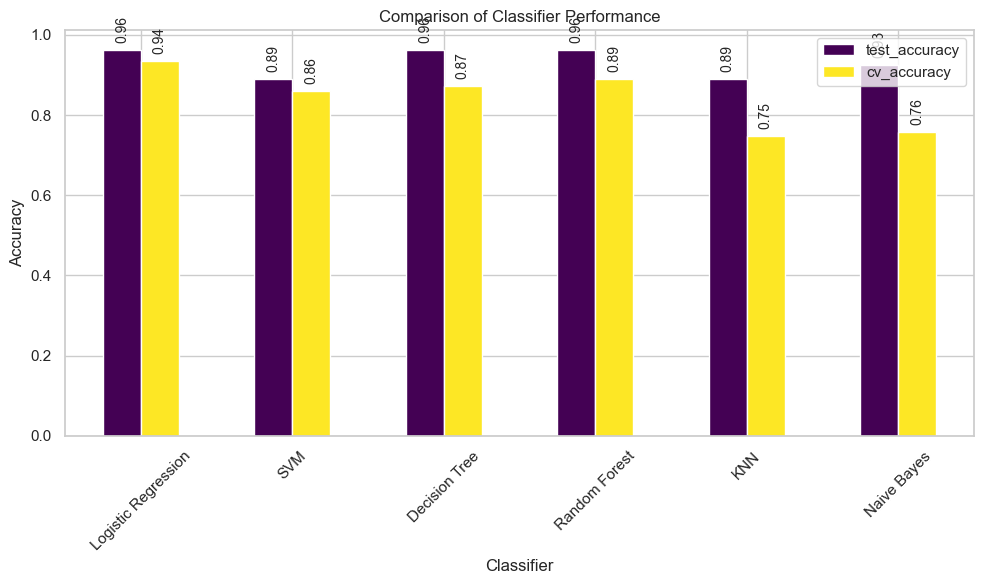

In [11]:

# اجرای تابع
evaluate_classifiers(X, Y)

In [12]:
def evaluate_classifiers(X, y):
    # تقسیم داده‌ها به داده‌های آموزشی و تست
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # نرمالیزه کردن داده‌ها
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # تعریف مدل‌ها
    models = {
        "Logistic Regression": LogisticRegression(),
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "KNN": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB()
    }
    
    # دیکشنری برای ذخیره نتایج مدل‌ها
    results = {}

    # آموزش و ارزیابی مدل‌ها
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        with open(f'{model_name}.pkl', 'wb') as file:
            pickle.dump(model, file)
        
        # ارزیابی cross-validation برای جلوگیری از overfitting
        cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()  # میانگین دقت با cross-validation
        train_accuracy = model.score(X_train, y_train)  # دقت روی داده‌های آموزشی
        test_accuracy = accuracy_score(y_test, y_pred)  # دقت روی داده‌های تست
        print(f"Accuracy: {accuracy * 100:.2f}%")
        # دقت مدل




        conf_matrix = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(conf_matrix)



        # نمایش ماتریس confusion به صورت گرافیکی
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix {model_name}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()
        # ذخیره نتایج
        results[model_name] = {
            "train_accuracy": train_accuracy,
            "test_accuracy": test_accuracy,
            "cv_accuracy": cv_score,
            "model": model
        }

    # تبدیل نتایج به DataFrame برای راحتی در تحلیل و رسم نمودار
    results_df = pd.DataFrame(results).T
    print(results_df)
    
    # بررسی نوع داده‌ها و تبدیل به نوع مناسب (عدد) اگر لازم باشد
    results_df = results_df.apply(pd.to_numeric, errors='coerce')

    # تحلیل overfitting و underfitting
    for model_name, metrics in results.items():
        if metrics['train_accuracy'] - metrics['test_accuracy'] > 0.2:  # 20% اختلاف زیاد نشان‌دهنده overfitting
            print(f"{model_name} might be overfitting!")
        elif metrics['train_accuracy'] < 0.6:  # دقت پایین روی داده‌های آموزشی نشان‌دهنده underfitting
            print(f"{model_name} might be underfitting!")
    
    # انتخاب بهترین مدل بر اساس دقت تست و دقت cross-validation
    best_model = results_df.loc[results_df['test_accuracy'].idxmax()]

    print("\nBest Model Based on Test Accuracy and Cross-Validation:")
    print(f"Model: {best_model.name}")
    print(f"Test Accuracy: {best_model['test_accuracy']:.2f}")
    print(f"Train Accuracy: {best_model['train_accuracy']:.2f}")
    print(f"Cross-Validation Accuracy: {best_model['cv_accuracy']:.2f}")
    
    # رسم نمودار مقایسه‌ای برای ارزیابی عملکرد مدل‌ها
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))  # برای قرار دادن دو نمودار در یک سطر
    
    # 1. رسم نمودار میله‌ای
    results_df[[ 'test_accuracy', 'cv_accuracy']].plot(kind='bar', ax=ax[0], cmap='viridis', legend=True)
    ax[0].set_title('Comparison of Classifier Performance (Bar Chart)')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Classifier')
    ax[0].tick_params(axis='x', rotation=45)
    
    # اضافه کردن اعداد عمودی روی میله‌ها
    for p in ax[0].patches:
        ax[0].annotate(f'{p.get_height():.2f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       xytext=(0, 5),  # offset
                       textcoords='offset points',
                       ha='center', va='bottom', fontsize=10, rotation=90)  # عمودی

    # 2. رسم Heatmap برای مقایسه دقت‌ها
    sns.heatmap(results_df[['train_accuracy', 'test_accuracy', 'cv_accuracy']].T, annot=True, fmt='.2f', cmap='RdPu', cbar=True, ax=ax[1])
    ax[1].set_title('Performance Heatmap of Classifiers')
    ax[1].set_xlabel('Classifier')
    ax[1].set_ylabel('Metrics')
    
    plt.tight_layout()
    

    
    
    plt.show()
    return models

Accuracy: 96.30%
Confusion Matrix:
[[ 6  1]
 [ 0 20]]


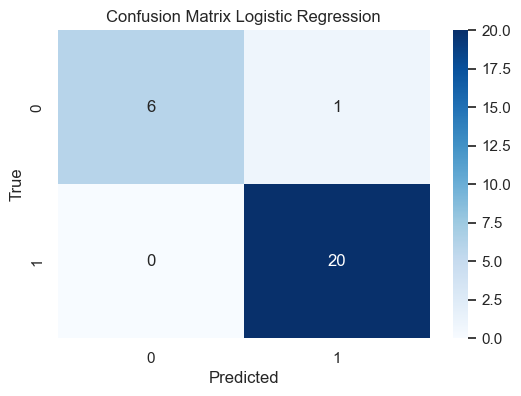

Accuracy: 96.30%
Confusion Matrix:
[[ 6  1]
 [ 2 18]]


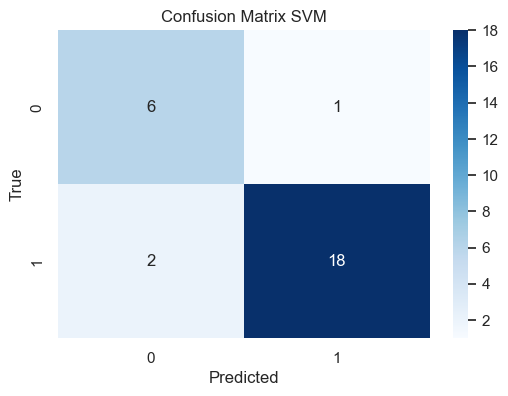

Accuracy: 96.30%
Confusion Matrix:
[[ 6  1]
 [ 0 20]]


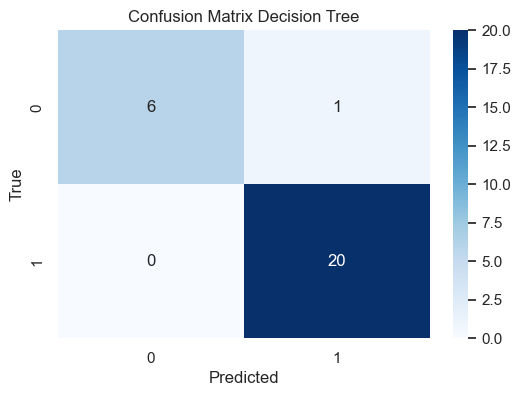

Accuracy: 96.30%
Confusion Matrix:
[[ 6  1]
 [ 0 20]]


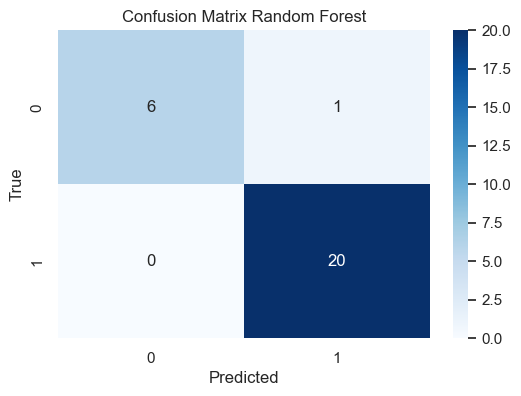

Accuracy: 96.30%
Confusion Matrix:
[[ 4  3]
 [ 0 20]]


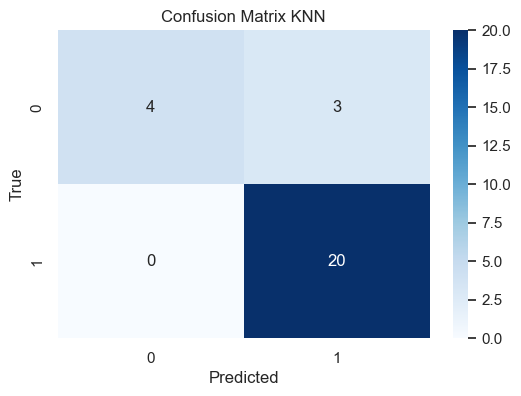

Accuracy: 96.30%
Confusion Matrix:
[[ 6  1]
 [ 1 19]]


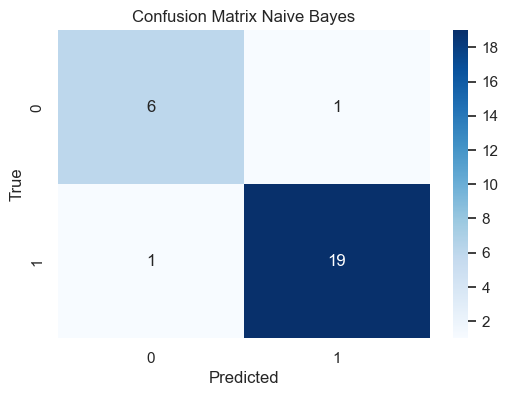

                    train_accuracy test_accuracy cv_accuracy  \
Logistic Regression            1.0      0.962963    0.935897   
SVM                            1.0      0.888889    0.858974   
Decision Tree                  1.0      0.962963    0.874359   
Random Forest                  1.0      0.962963    0.889744   
KNN                       0.904762      0.888889    0.748718   
Naive Bayes                    1.0      0.925926    0.757692   

                                                                 model  
Logistic Regression                               LogisticRegression()  
SVM                                                              SVC()  
Decision Tree                                 DecisionTreeClassifier()  
Random Forest        (DecisionTreeClassifier(max_features='sqrt', r...  
KNN                                             KNeighborsClassifier()  
Naive Bayes                                               GaussianNB()  

Best Model Based on Test Accuracy and C

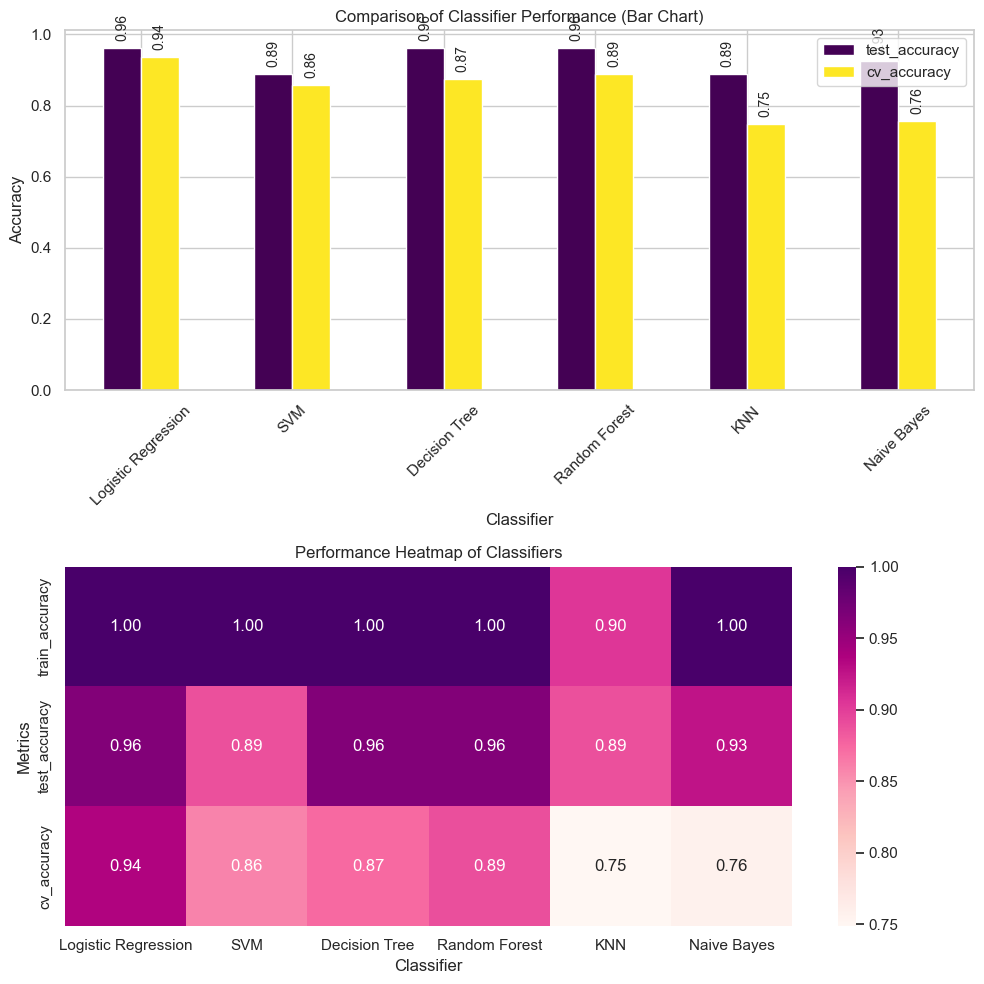

{'Logistic Regression': LogisticRegression(),
 'SVM': SVC(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'KNN': KNeighborsClassifier(),
 'Naive Bayes': GaussianNB()}

In [13]:
# اجرای تابع
evaluate_classifiers(X, Y)